In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [4]:
#only european countries, excluding spain and portugal
df = read_merged().reset_index()

#all countries
# df = read_merged().reset_index

In [5]:
df.pivot(index="date", columns="country", values="inflation")

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# 2. AR model per country

In [5]:
model = FourQuarterAverageModel()
model

In [6]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [7]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


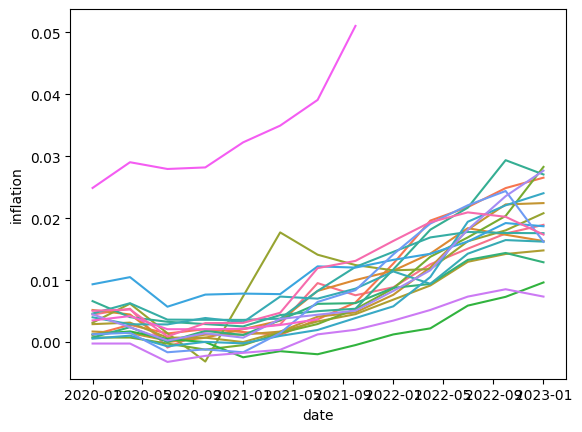

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [9]:
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [10]:
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


In [11]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
160,2022-01-01,Australia,0.008847,0.021295
161,2022-01-01,Belgium,0.012674,0.033275
162,2022-01-01,Canada,0.011531,0.020211
163,2022-01-01,Denmark,0.007637,0.021536
164,2022-01-01,France,0.006854,0.014870
...,...,...,...,...
255,2023-01-01,Sweden,0.027675,0.014955
256,2023-01-01,Switzerland,0.007345,0.010084
257,2023-01-01,Türkiye,NaN,NaN
258,2023-01-01,United Kingdom,NaN,NaN


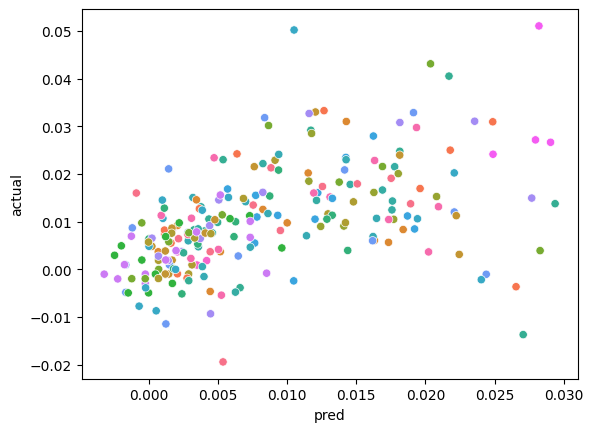

In [12]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [13]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     79.93
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.20e-16
Time:                        08:57:03   Log-Likelihood:                 768.80
No. Observations:                 236   AIC:                            -1534.
Df Residuals:                     234   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.001      4.993      0.000       0.003       0.006
pred           0.6906      0.077      8.940      0.000       0.538       0.843
==============================================================================
Omnibus:                       16.994   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.540
Skew:                           0.143   Prob(JB):                     1.75e-11
Kurtosis:                       5.226   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

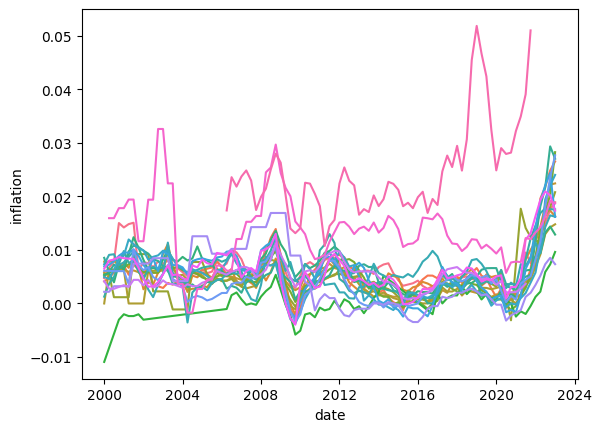

In [15]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(lambda: model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [16]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(lambda: ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 138.46it/s]


/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/ho

,date,country,inflation
0,1999-04-01,Japan,0.003463
1,2000-01-01,Canada,0.005821
2,2000-01-01,United States,0.010357
3,2000-01-01,Australia,0.007046
4,2000-01-01,New Zealand,0.003327
...,...,...,...
1516,2023-01-01,Norway,-0.012971
1517,2023-01-01,Belgium,0.011224
1518,2023-01-01,Korea,-0.000527
1519,2023-01-01,South Africa,0.020396


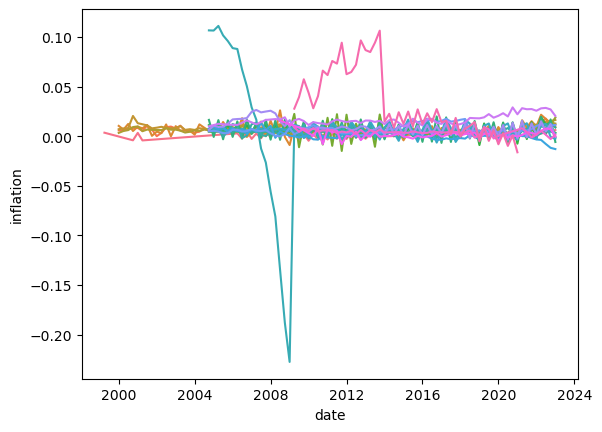

In [24]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [25]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(lambda: PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

Splits: 100%|██████████| 5/5 [00:02<00:00,  2.21it/s]


,date,country,inflation
0,2000-01-01,Australia,0.004676
1,2000-01-01,Belgium,-0.000205
2,2000-01-01,Canada,-0.003708
3,2000-01-01,Denmark,-0.001454
4,2000-01-01,France,-0.000054
...,...,...,...
1799,2023-01-01,Sweden,0.011736
1800,2023-01-01,Switzerland,0.012828
1801,2023-01-01,Türkiye,0.044421
1802,2023-01-01,United Kingdom,0.007336


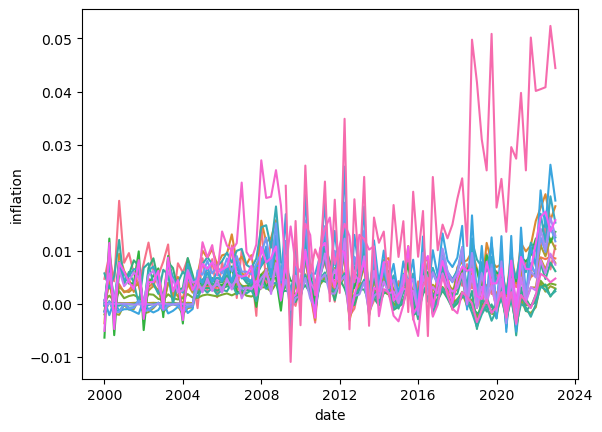

In [26]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [27]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x00000199B2F0F0D0>)


100%|██████████| 20/20 [00:00<00:00, 32.08it/s]


Fitted!


Splits: 100%|██████████| 5/5 [01:10<00:00, 14.11s/it]


,inflation,country,date
0,0.007416,Japan,1999-04-01
1,0.005908,Canada,2000-01-01
2,0.005928,United States,2000-01-01
3,0.003354,Australia,2000-01-01
4,0.000507,New Zealand,2000-01-01
...,...,...,...
1829,0.007183,Norway,2023-01-01
1830,0.032085,Belgium,2023-01-01
1831,0.013301,Korea,2023-01-01
1832,0.015005,South Africa,2023-01-01


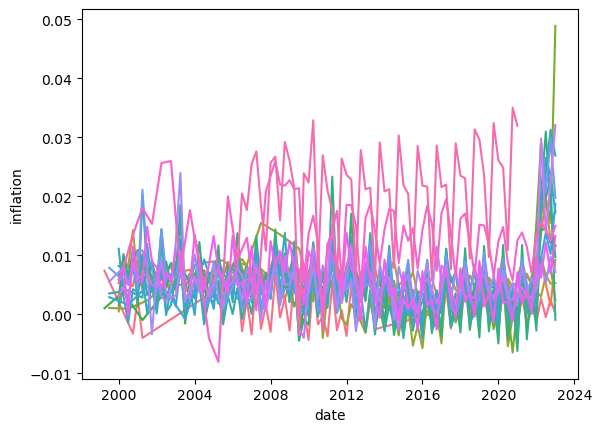

In [28]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [29]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    lambda: RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Splits: 100%|██████████| 5/5 [00:00<00:00, 10.11it/s]


,date,country,inflation
0,2000-01-01,Australia,0.010409
1,2000-01-01,Belgium,0.004883
2,2000-01-01,Canada,0.007465
3,2000-01-01,Denmark,0.008766
4,2000-01-01,Italy,0.005205
...,...,...,...
1648,2023-01-01,South Africa,0.017141
1649,2023-01-01,Spain,0.001884
1650,2023-01-01,Sweden,0.000854
1651,2023-01-01,Switzerland,-0.000993


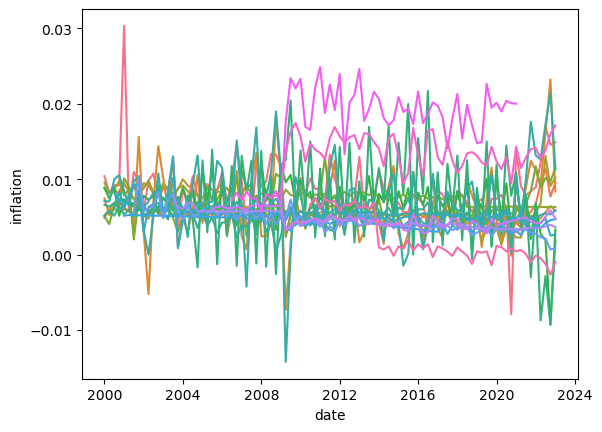

In [30]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [31]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    lambda: DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 319.92it/s]


,country,inflation,date
0,Australia,0.010640,2000-01-01
1,Belgium,0.004658,2000-01-01
2,Canada,0.007587,2000-01-01
3,Denmark,0.008817,2000-01-01
4,Italy,0.004501,2000-01-01
...,...,...,...
1648,South Africa,0.017402,2023-01-01
1649,Spain,0.001687,2023-01-01
1650,Sweden,0.000625,2023-01-01
1651,Switzerland,-0.000362,2023-01-01


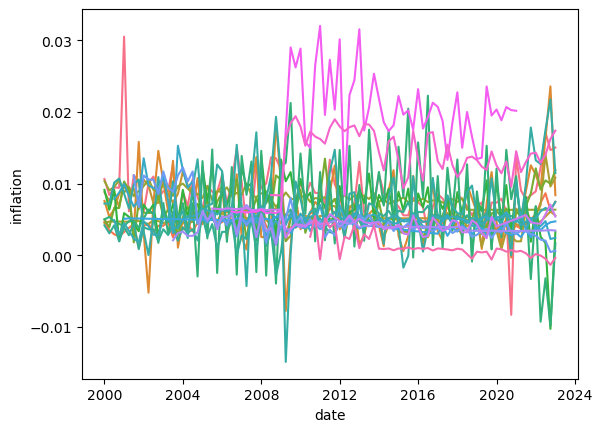

In [32]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [33]:
model = DistanceModel()
model.fit(df[df["date"] <= "2000-01-01"])
model

Creating regression coefficients: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]


In [34]:
pd.Series(model.country_intercepts.mean(axis = 0), index= model.countries.tolist() + ["mean"]).sort_values()

United Kingdom   -0.912920
France           -0.795415
Belgium          -0.733063
Netherlands      -0.695884
Germany          -0.610777
Switzerland      -0.593277
Portugal         -0.577300
Spain            -0.559001
Italy            -0.471446
Japan            -0.462566
mean             -0.381742
Denmark          -0.313996
Norway           -0.253890
Korea            -0.209589
New Zealand      -0.159337
Sweden           -0.147863
South Africa      0.012184
Canada            0.041018
United States     0.052873
Australia         0.137152
dtype: float64

<Axes: xlabel='date'>

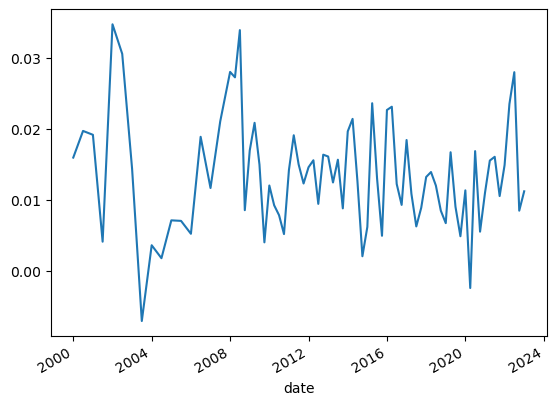

In [35]:
df.query("country == 'South Africa'").set_index("date")["inflation"].plot()

In [36]:
preds = h_period_ahead_forecast(model, df, "2000-01-01", h=1)
preds

,country,inflation,date
0,Australia,0.010649,2000-01-01
1,Belgium,0.005059,2000-01-01
2,Canada,0.007588,2000-01-01
3,Denmark,0.008425,2000-01-01
4,Italy,0.004695,2000-01-01
...,...,...,...
1648,South Africa,0.009883,2023-01-01
1649,Spain,0.004146,2023-01-01
1650,Sweden,0.002609,2023-01-01
1651,Switzerland,0.004581,2023-01-01


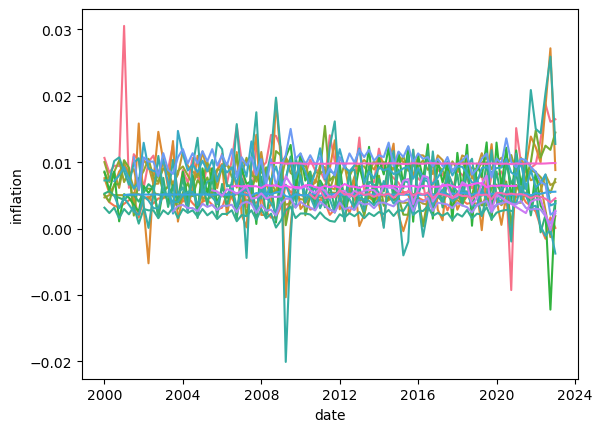

In [37]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()
# plt.ylim(-0.08,0.08)

In [38]:
preds.query("inflation > 1")

,country,inflation,date


In [39]:
model._create_lagged_variables(df.set_index("date")).query("country == 'Spain' and date == '2020-04-01'").T

date,2020-04-01
country,Spain
inflation,0.000963
gdp_growth,-17.64025
interest_rate,0.0
unemployment_rate,15.3
commodity_CRUDE_PETRO,0.225235
commodity_iNATGAS,-0.183155
commodity_iAGRICULTURE,0.004542
commodity_iMETMIN,0.072359
commodity_iPRECIOUSMET,0.100256


In [40]:
import numpy as np
from scipy.stats import percentileofscore

feature_df = model._create_lagged_variables(df.set_index("date"))
# we calculate the quantiles for all float64 dtypes
cols = feature_df.select_dtypes("float64").columns
specific_feature_map = feature_df.query("country == 'Spain' and date == '2020-04-01'")

percentile_columns = pd.DataFrame(index=specific_feature_map.index)

# Calculating percentile ranks for each float column in 'specific_feature_map'.
for col in cols:
    # This will hold the percentile ranks for the current column.
    col_percentiles = []
    
    # Iterate through each row in 'specific_feature_map' to calculate the percentile rank of its value in 'feature_df'.
    for value in specific_feature_map[col]:
        percentile_rank = percentileofscore(feature_df[col].dropna(), value, kind='rank')
        col_percentiles.append(percentile_rank)
    
    # Assigning calculated percentile ranks to the new columns.
    percentile_columns[f'{col}'] = col_percentiles

percentile_columns["country"] = specific_feature_map["country"]

pd.concat([
    specific_feature_map,
    percentile_columns
], keys = ["feature_value", "percentile"]).T

,feature_value,percentile
date,2020-04-01,2020-04-01
country,Spain,Spain
inflation,0.000963,20.175035
gdp_growth,-17.64025,0.092123
interest_rate,0.0,9.672962
unemployment_rate,15.3,93.965914
commodity_CRUDE_PETRO,0.225235,90.925841
commodity_iNATGAS,-0.183155,11.008752
commodity_iAGRICULTURE,0.004542,56.932289
commodity_iMETMIN,0.072359,75.587287


In [41]:
preds.query("country == 'Switzerland' and date == '2010-07-01'").T

,684
country,Switzerland
inflation,0.005129
date,2010-07-01 00:00:00


# Get scores

In [16]:
from seminartools.models.utils import get_stats
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.models.pca_var_model import PCAVARModel
from seminartools.models.armax_model import ARMAXModel
from seminartools.models.uc_sv_ss_model import UCSVSSModel
from seminartools.models.random_effects_model import RandomEffectsModel
from seminartools.models.distance_model import DistanceModel
from seminartools.models.mucsvss_model import MUCSVSSModel
from seminartools.models.cov_bhm_model import CovBHMModel

muc_model = MUCSVSSModel(num_particles=100008, stochastic_seasonality=True)
muc_model.load_from_disk("../../models/mucsvss_model_100008_deterministic_all.pkl")
muc_model

I0000 00:00:1713776231.432980 3406198 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [17]:
exog_columns = [
    "gdp_growth",
    "interest_rate",
    "unemployment_rate",
    "commodity_CRUDE_PETRO",
    "commodity_iNATGAS",
    "commodity_iAGRICULTURE",
    "commodity_iMETMIN",
    "commodity_iPRECIOUSMET",
]

stats = get_stats(
    [
        # ("4qa", lambda: FourQuarterAverageModel()),
        # ("pca_var", lambda: PCAVARModel(standardize_pre_post=True)),
        # ("ar", lambda: ARMAXModel(max_p=2, max_q=0)),
        # (
        #     "arx",
        #     lambda: ARMAXModel(max_p=2, max_q=0, exogenous_columns=exog_columns),
        # ),
        # ("pca_var_2", lambda: PCAVARModel(num_pcs = 2)),
        # ("pca_var_3", lambda: PCAVARModel()),
        # ("pca_var_4", lambda: PCAVARModel(num_pcs = 4)),
        # ("pca_var_5", lambda: PCAVARModel(num_pcs = 5)),
        # ("pca_var_6", lambda: PCAVARModel(num_pcs = 6)),
        # ("arma", lambda: ARMAXModel(max_p=2, max_q=2)),
        # (
        #     "armax",
        #     lambda: ARMAXModel(max_p=2, max_q=2, exogenous_columns=exog_columns),
        # ),
        (
            "uc_sv",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=False),
        ),
        (
            "uc_sv_ss",
            lambda: UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
        ),
        # ("random_effects", lambda: RandomEffectsModel()),
        # (
        #     "random_effects_x",
        #     lambda: RandomEffectsModel(exogenous_columns=exog_columns),
        # ),
        # ("distance", lambda: DistanceModel()),
        # ("distance_x", lambda: DistanceModel(exogenous_columns=exog_columns)),
        # ("mucsvss", lambda: muc_model),
    ],
    df,
    tss,
    num_cores_parallel_models=1,  # only 1 model at once because models use joblib internally and nested joblib gives issues
    num_cores_parallel_splits=1
)
stats

c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message w

Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x7f4da82fd790>)


100%|██████████| 20/20 [00:00<00:00, 1092.81it/s]


Fitted!


c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


Fitting model on the full dataset... (model=<seminartools.models.uc_sv_ss_model.UCSVSSModel object at 0x0000029CDCC97710>)


100%|██████████| 20/20 [00:00<00:00, 36.13it/s]


Fitted!


c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message w

Fitting model on the full dataset... (model=<seminartools.models.mucsvss_model.MUCSVSSModel object at 0x0000029CDA377290>)
Fitted!


c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
c:\Users\vandi\AppData\Local\anaconda3\envs\py311\Lib\site-packages\statsmodels\base\model.py:1914: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
c:\Users

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic,p-value
pca_var,0.000050,0.005230,0.235553,0.001531,0.732849,0.271930,41.519444,2.5370618770889276e-18
uc_sv,0.000059,0.005427,0.173994,0.001511,0.792157,0.188118,14.422336,6.170490068178719e-07


In [18]:
# format r2 column to 2 
format_stats = stats.copy()
format_stats['p-value'] =format_stats['p-value'].astype(float)
round_cols = ["r2", "mz_intercept", "mz_slope", "mz_r2", "mz_wald_test_statistic", "p-value"]
for col in round_cols:
    format_stats[col] = format_stats[col].apply(lambda x: round(x, 3))

format_stats['mz_wald_test_statistic'] = format_stats['mz_wald_test_statistic'].astype(str) + '(' + format_stats['p-value'].astype(str) + ')'
format_stats.drop(columns = ['p-value'], inplace = True)

# get relative to UCSV
format_stats.loc[:,["mse","mae"]] = format_stats.loc[:,["mse","mae"]].div(format_stats.loc["uc_sv",["mse","mae"]])
format_stats

C:\Users\vandi\AppData\Local\Temp\ipykernel_30652\595229972.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.7836807429177128 0.9262608935307811 1.0 1.0006502868089455
 1.1009152505539919 1.2640735461774688 1.3038360885387206
 1.3060659135597323 1.3068601703391016 1.5955568056625076
 1.6138874453916097 3.990757340726249 4.557079392038199 13.875582230213519
 369.84251337284365]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  format_stats.loc[:,["mse","mae"]] = format_stats.loc[:,["mse","mae"]].div(format_stats.loc["uc_sv",["mse","mae"]])
C:\Users\vandi\AppData\Local\Temp\ipykernel_30652\595229972.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.8480270044808729 0.9692914383984483 1.0 1.0003876335461817
 1.0717193474946525 1.1216651808162557 1.138998378845445 1.139556403959799
 1.129947379

,mse,mae,r2,mz_intercept,mz_slope,mz_r2,mz_wald_test_statistic
pca_var,0.845592,0.963622,0.236,0.002,0.733,0.272,41.519(0.0)
uc_sv,1.0,1.0,0.174,0.002,0.792,0.188,14.422(0.0)


In [19]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    format_stats.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023",
        label="tab:model_eval",
        float_format="%.4f",
    )
)

\begin{table}
\caption{MSPE, MAE, $R^2$, and Mincer-Zarnowitz statistics, out-of-sample, 2000-2023}
\label{tab:model_eval}
\begin{tabular}{lllrrrrl}
\toprule
 & mse & mae & r2 & mz\_intercept & mz\_slope & mz\_r2 & mz\_wald\_test\_statistic \\
\midrule
pca\_var & 0.8456 & 0.9636 & 0.2360 & 0.0020 & 0.7330 & 0.2720 & 41.519(0.0) \\
uc\_sv & 1.0000 & 1.0000 & 0.1740 & 0.0020 & 0.7920 & 0.1880 & 14.422(0.0) \\
\bottomrule
\end{tabular}
\end{table}

